<a href="https://colab.research.google.com/github/Oriane-O/Fashion-Recommendation-System/blob/main/Fashion_Reco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BUILDING A FASHION RECOMMENDATION SYSTEM**




**1.   Extracting the dataset**



In [22]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We start by importing the librairies and extracting our zip file dataset

In [23]:
from zipfile import ZipFile
import os

zip_file_path='/content/drive/MyDrive/Colab Notebooks/women-fashion.zip'
extraction_directory='/content/drive/MyDrive/Colab Notebooks/women-fashion'

if not os.path.exists(extraction_directory):
  os.makedirs(extraction_directory)

with ZipFile(zip_file_path,'r') as zip_ref:
  zip_ref.extractall(extraction_directory)

extracted_files=os.listdir(extraction_directory)
print(extracted_files[:5])

['women fashion', '__MACOSX']


In [24]:
# updating the path to list the content from the 'women fashion' file
extraction_directory_updated=os.path.join(extraction_directory,'women fashion')
extracted_files_updated=os.listdir(extraction_directory_updated)
extracted_files_updated[:5], len(extracted_files_updated)

(['white knee-length dress with a fitted design and long sleeves.webp',
  'short, white, sleeveless dress with thin straps.jpg',
  'deep burgundy, silky dress with long sleeves and a wrap-style front.jpg',
  'long, intricately designed dress with full sleeves.jpg',
  'beige top adorned with black dots and a green skirt.jpg'],
 97)

We now wanna look at the first image of our dataset

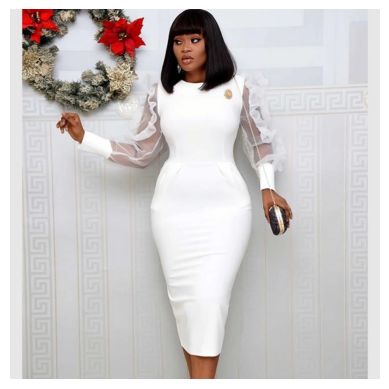

In [52]:
from PIL import Image
import matplotlib.pyplot as plt

#load and display an image
def display_image(file_path):
  image=Image.open(file_path)
  plt.imshow(image)
  plt.axis('off')
  plt.show()

# display the first image from our dataset
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
display_image(first_image_path)

We now create a list of all image file path that we can use later,and we ensure to keep only the images with the right format

In [26]:
import glob

image_directory=extraction_directory_updated
image_paths_list=[file for file in glob.glob(os.path.join(image_directory,'*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

print(image_paths_list[:5])

['/content/drive/MyDrive/Colab Notebooks/women-fashion/women fashion/white knee-length dress with a fitted design and long sleeves.webp', '/content/drive/MyDrive/Colab Notebooks/women-fashion/women fashion/short, white, sleeveless dress with thin straps.jpg', '/content/drive/MyDrive/Colab Notebooks/women-fashion/women fashion/deep burgundy, silky dress with long sleeves and a wrap-style front.jpg', '/content/drive/MyDrive/Colab Notebooks/women-fashion/women fashion/long, intricately designed dress with full sleeves.jpg', '/content/drive/MyDrive/Colab Notebooks/women-fashion/women fashion/beige top adorned with black dots and a green skirt.jpg']


**2.   Preprocessing the images & use a pre-trained model**



In [27]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

In [28]:
base_model=VGG16(weights='imagenet',include_top=False) # without the classification layers of VGG16,the model returns only the visual features
model=Model(inputs=base_model.input,outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224)) #load the image and resize it for VGG16
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded) #normalise the image for VGG

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten() #transforms the 3D features to a 1D vector
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

In this project, we use the pre-trained VGG16 model to extract visual features from images. VGG16 is a simple, robust, and widely used architecture in computer vision. Because it was trained on the large ImageNet dataset, it has learned to recognize a wide variety of shapes, textures, and visual patterns.

We remove the final classification layers so we can use only the convolutional part of the network, which captures the essential visual information. Each image is first loaded and preprocessed to match the expected VGG16 format. It is then passed through the model to obtain a descriptive feature vector, which we flatten and normalize.

This choice of model provides high-quality visual representations without the need to retrain a full neural network, making it ideal for comparing images or analyzing their similarity.

**3. Building the recommendation system**




Now that we havve the feature vectors (all_features) and their corresponding image filenames (all_image_names), providing a structured dataset, we can build our fashion recommendation system using image features.

For that, we will use the cosine similarity method.

In [33]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path,all_features,all_image_names,model, top_n=5):
  #pre-process the input image anc extract features
  preprocessed_img=preprocess_image(input_image_path)
  input_features=extract_features(model,preprocessed_img)

  #calculate similarities betweenour input and all features
  similarities=[1-cosine(input_features,other_features) for other_features in all_features]
  #find the top N similar images
  similar_indices=np.argsort(similarities)[-top_n:] # argsort sort low to high

  # filter out the input image index from similar_indices
  input_name = os.path.basename(input_image_path)
  similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_name)]

  # display the input image
  plt.figure(figsize=(15, 10))
  plt.subplot(1, top_n + 1, 1)
  plt.imshow(Image.open(input_image_path))
  plt.title("Input Image")
  plt.axis('off')

  # display similar images
  for i, idx in enumerate(similar_indices[:top_n], start=1):
      image_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/women-fashion/women fashion', all_image_names[idx])
      plt.subplot(1, top_n + 1, i + 1)
      plt.imshow(Image.open(image_path))
      plt.title(f"Recommendation {i}")
      plt.axis('off')

  plt.tight_layout()
  plt.show()




For a specified input image, the function preprocesses the image, extracts its features, and calculates the cosine similarity between this feature vector and those of other images in the dataset (all_features). It ranks these images based on similarity and selects the top N most similar images to recommend, explicitly excluding the input image from being recommended to itself by filtering out its index from the list of similar indices.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


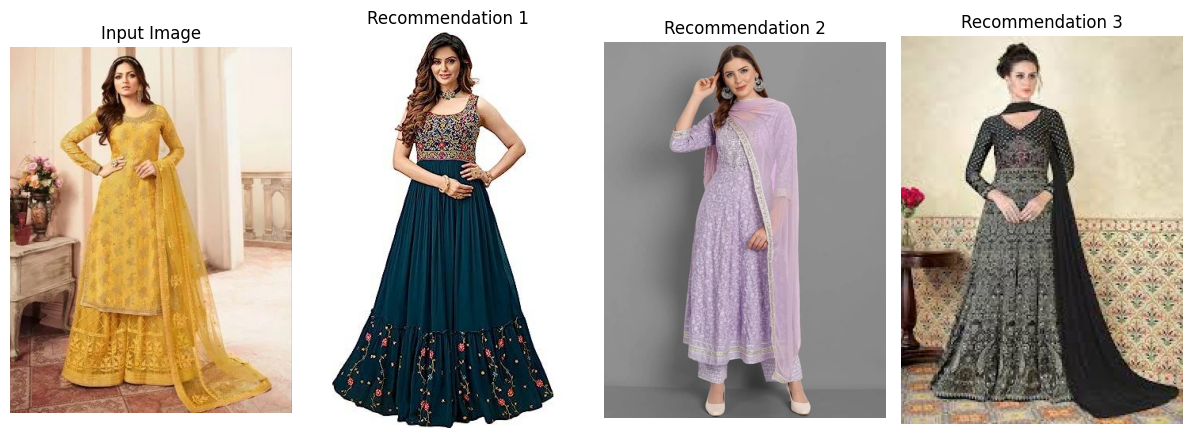

In [65]:
#Test
input_image_path='/content/drive/MyDrive/Colab Notebooks/women-fashion/women fashion/yellow, intricately designed Anarkali suit.jpeg'
recommend_fashion_items_cnn(input_image_path,all_features,all_image_names,model,top_n=4)

**4. Recommendation system with more importance of the color**

If we want to give more weight to the color of the clothing, but to anlyse it we need to ignore the color of the background which is in general in majority. In the exemple below we see that the major color is in the whites,for the background.

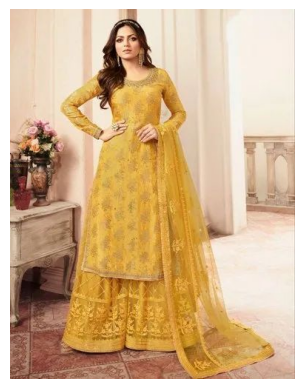

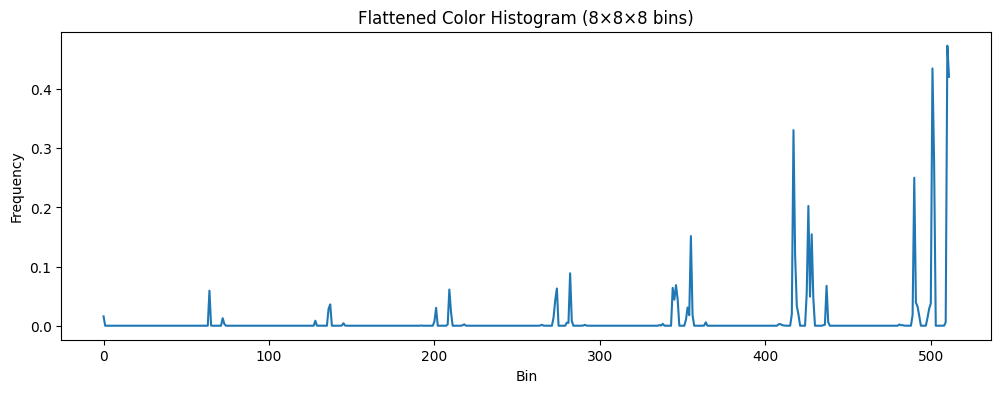

In [66]:
import cv2

def extract_color_hist(img_path, bins=(8,8,8)):
    #Extracts a 3D color histogram and normalizes it.
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    hist = cv2.calcHist([img], [0,1,2], None, bins,
                        [0,256, 0,256, 0,256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist
display_image('/content/drive/MyDrive/Colab Notebooks/women-fashion/women fashion/yellow, intricately designed Anarkali suit.jpeg')
hist=extract_color_hist('/content/drive/MyDrive/Colab Notebooks/women-fashion/women fashion/yellow, intricately designed Anarkali suit.jpeg')
plt.figure(figsize=(12,4))
plt.plot(hist)
plt.title("Flattened Color Histogram (8×8×8 bins)")
plt.xlabel("Bin")
plt.ylabel("Frequency")
plt.show()

So we will consider only the center of the image which is in general in the e-commerce photos centered on the clothes.

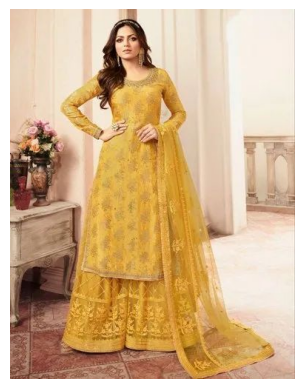

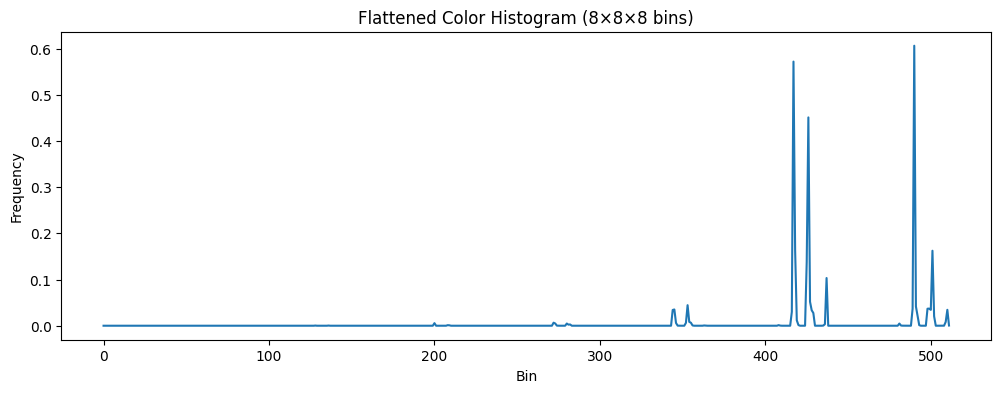

In [67]:
def extract_color_hist_center(img_path, bins=(8,8,8)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    h, w, _ = img.shape
    # crop central 40% × 40%
    crop = img[
        int(h*0.3): int(h*0.7),
        int(w*0.3): int(w*0.7)
    ]

    hist = cv2.calcHist([crop], [0,1,2], None, bins,
                        [0,256, 0,256, 0,256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

display_image('/content/drive/MyDrive/Colab Notebooks/women-fashion/women fashion/yellow, intricately designed Anarkali suit.jpeg')
hist=extract_color_hist_center('/content/drive/MyDrive/Colab Notebooks/women-fashion/women fashion/yellow, intricately designed Anarkali suit.jpeg')
plt.figure(figsize=(12,4))
plt.plot(hist)
plt.title("Flattened Color Histogram (8×8×8 bins)")
plt.xlabel("Bin")
plt.ylabel("Frequency")
plt.show()


In [57]:
def extract_combined_features(model, img_path):
    preprocessed_img = preprocess_image(img_path)
    cnn_features = extract_features(model, preprocessed_img)
    color_features = extract_color_hist_center(img_path)

    # give more weight to color features
    weighted_color = 3 * color_features

    # combine CNN + color into one long vector
    combined = np.concatenate([cnn_features, weighted_color])
    return combined

In [58]:
def recommend_fashion_items_cnn2(input_image_path, all_features, all_image_names, model, top_n=5):

    # --- Extract combined features for input image ---
    input_features = extract_combined_features(model, input_image_path)

    # --- Compute similarity with all stored features ---
    similarities = [1 - cosine(input_features, other_features)
                    for other_features in all_features]

    # --- Find top N most similar images ---
    similar_indices = np.argsort(similarities)[-top_n:]

    # --- Remove the input image itself if present ---
    input_name = os.path.basename(input_image_path)
    similar_indices = [idx for idx in similar_indices
                       if all_image_names[idx] != input_name]

    # --- Display input image ---
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # --- Display recommended images ---
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/women-fashion/women fashion',
                                  all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [59]:
all_features2 = []
all_image_names2 = []

for img_path in image_paths_list:
    combined_feats = extract_combined_features(model, img_path)
    all_features2.append(combined_feats)
    all_image_names2.append(os.path.basename(img_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


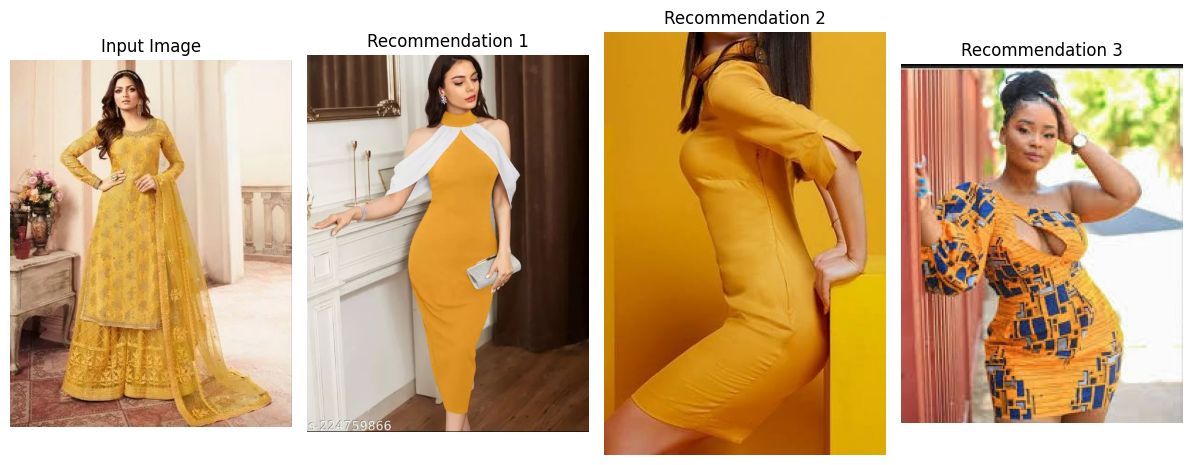

In [68]:
#Test
input_image_path='/content/drive/MyDrive/Colab Notebooks/women-fashion/women fashion/yellow, intricately designed Anarkali suit.jpeg'
recommend_fashion_items_cnn2(input_image_path,all_features2,all_image_names2,model,top_n=4)